# burasi duzenlemeyi bitirene kadar test notebooku

In [1]:
import numpy as np
import pandas as pd

from utils import *
from training import *
from selection import *

In [2]:
test_features = ['mel_11',
 'complexity',
 'spc_roff',
 'mel_10',
 'slope',
 'mel_12',
 'mel_9',
 'mel_6',
 'mel_8',
 'mel_7',
 'mel_13',
 'spc_cnt',
 'mel_14',
 'mel_5',
 'mfcc_2',
 'mfcc_8',
 'mobility',
 'zc',
 'mel_1',
 'mfcc_6',
 'mel_2',
 'mel_0',
 'mel_3',
 'dfa',
 'mel_4',
 'gamma_beta',
 'gamma_alpha',
 'mfcc_1',
 'mfcc_0',
 'mfcc_3',
 'alpha_delta',
 'chr_14',
 'chr_13',
 'chr_12',
 'chr_11',
 'alpha_theta',
 'beta_alpha',
 'mfcc_5',
 'mfcc_4',
 'gamma_delta',
 'mfcc_7',
 'gamma_theta',
 'beta_theta',
 'chr_2',
 'chr_1',
 'chr_4',
 'chr_3',
 'theta_delta',
 'rms',
 'skew',
 'chr_10',
 'beta_delta',
 'chr_5',
 'ton_1',
 'chr_15',
 'mfcc_9',
 'alpha_power',
 'chr_6',
 'chr_0',
 'chr_7',
 'gamma_power',
 'ton_4',
 'ton_5',
 'ton_3',
 'beta_power',
 'activity',
 'chr_18',
 'chr_17',
 'theta_power',
 'kurtosis',
 'delta_power',
 'chr_19',
 'chr_8',
 'ton_0',
 'ton_2',
 'chr_9',
 'mean_abs_sec_dif',
 'chr_16',
 'tempo']

In [3]:
# load the feature dataset as a dataframe
csv_file = 'eeg_features.csv'
channel_list = ['F3', 'F4', 'C3', 'Cz', 'Oz', 'Fp1', 'Fp2', 'FT7', 'F8', 'Fz', 'C4']
dataset = data_loader(csv_file)
reduced_dataset = channel_selection(dataset, channel_list)
data = data_preparation(dataset=reduced_dataset, feature_subset=test_features)


In [4]:
for model in ['K-NN']:
    model_training(data, model, verbose=True)

Accuracy of K-NN classifier on training set: 0.92407126
Accuracy of K-NN classifier on test set: 0.87345471


In [5]:
p_all, p_dict = p_value_thresholding(reduced_dataset, feature_subset=test_features)

/Users/kemalcankucuk/Documents/PAWS Work/eeg-attention/selection.py:77: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = stats.ttest_ind(


100%|██████████| 2/2 [00:00<00:00,  4.18it/s]


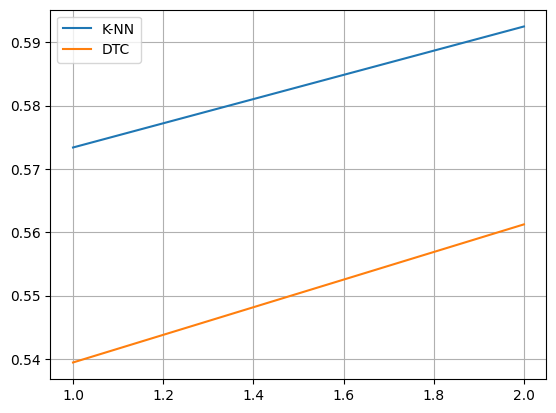

In [6]:
result = incremental_training(dataset=dataset, channel_list=channel_list, feature_subset=['spc_cnt', 'spc_roff'], models=['K-NN', 'DTC'], mode='feature', figure=True, save=True)
#result = incremental_training(dataset=dataset, channel_list=channel_list, feature_subset=test_features, models=['K-NN'], mode='feature', save=True)

100%|██████████| 2/2 [00:00<00:00,  5.25it/s]


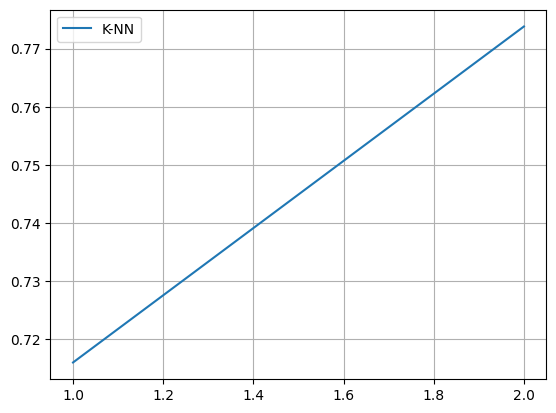

In [8]:
channel_list = ['F3', 'F4']
result_chn = incremental_training(dataset=dataset, channel_list=channel_list, feature_subset=test_features, models=['K-NN'], mode='channel', figure=True, save=True)